<a href="https://colab.research.google.com/github/vienne53/-/blob/main/wind_assigment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mean Wind Speed with 5% exceedance: 2.84 m/s
Mean Wind Speed with 95% exceedance: 26.40 m/s
Probability that the mean wind speed is higher than 10 m/s: 0.5957


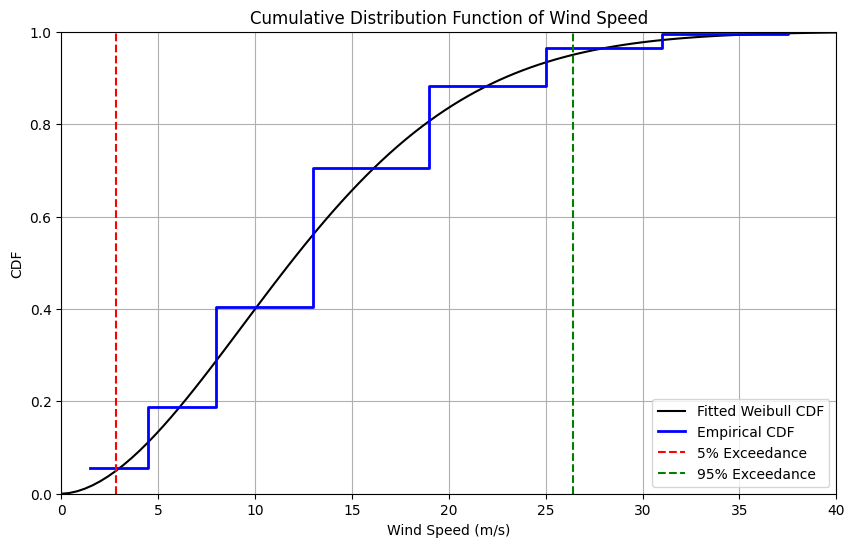

Weibull Distribution Parameters:
Shape parameter (k): 1.8234
Scale parameter (C): 14.4657
Weibull Distribution Formula with Parameters:
P(V) = 1 - e^(- (V / 14.4657)^1.8234)


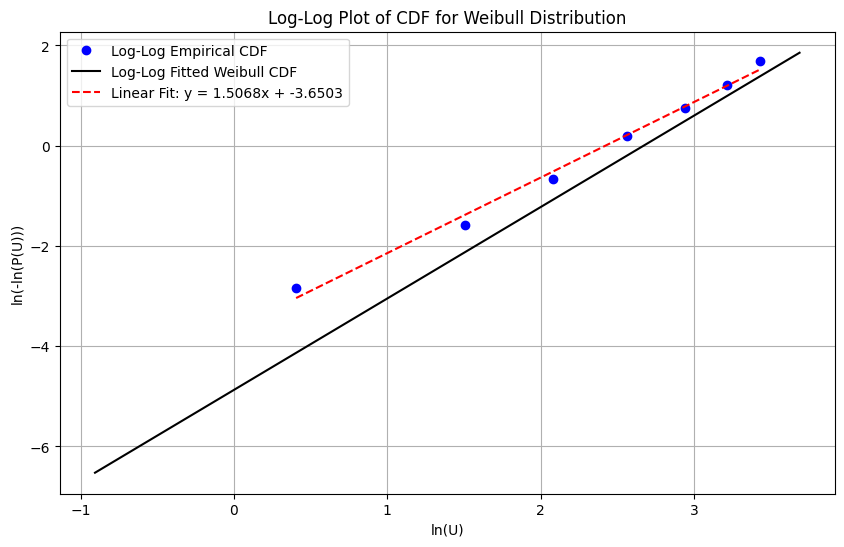

Weibull Distribution Parameters:
Shape parameter (k): 1.8234
Scale parameter (C): 14.4657
Weibull Distribution Formula with Parameters:
P(V) = 1 - e^(- (V / 14.4657)^1.8234)


In [9]:
import numpy as np
import pandas as pd
from scipy.stats import weibull_min
import matplotlib.pyplot as plt
#区间
bins = [(0, 3), (3, 6), (6, 10), (10, 16), (16, 22),
        (22, 28), (28, 34), (34, 41), (41, np.inf)]
hours = [4920, 11400, 18980, 26340, 15390,
         7290, 2610, 390, 0]

# create DataFrame
df = pd.DataFrame({
    'Wind Speed Range (m/s)': [f"{b[0]}-{b[1]}" if b[1] < np.inf else f"{b[0]}+" for b in bins],
    'Number of Hours': hours
})
# 计算中点和观察数据
midpoints = np.array([(b[0] + b[1]) / 2 for b in bins])
obs = np.repeat(midpoints, df['Number of Hours'])
# fit Weibull distribu
shape_param, loc_param, scale_param = weibull_min.fit(obs, floc=0)

# 计算在不同超越概率下的风速
exceedance_probs = [0.05, 0.95]
wind_speeds = weibull_min.ppf(exceedance_probs, shape_param, loc=loc_param, scale=scale_param)

print(f"Mean Wind Speed with 5% exceedance: {wind_speeds[0]:.2f} m/s")
print(f"Mean Wind Speed with 95% exceedance: {wind_speeds[1]:.2f} m/s")

# 计算总小时数
total_hours = df['Number of Hours'].sum()

# 估计风速超过 10 m/s 的概率
probability_over_10 = np.sum(df.loc[midpoints > 10, 'Number of Hours']) / total_hours
print(f"Probability that the mean wind speed is higher than 10 m/s: {probability_over_10:.4f}")

# plt
x = np.linspace(0, 40, 100)
weibull_cdf = weibull_min.cdf(x, shape_param, loc=loc_param, scale=scale_param)
empirical_cdf = np.cumsum(hours) / total_hours

plt.figure(figsize=(10, 6))
plt.plot(x, weibull_cdf, label='Fitted Weibull CDF', color='black')
plt.step(midpoints, empirical_cdf, where='post', label='Empirical CDF', color='blue', linewidth=2)
plt.axvline(wind_speeds[0], color='red', linestyle='--', label='5% Exceedance')
plt.axvline(wind_speeds[1], color='green', linestyle='--', label='95% Exceedance')

plt.xlabel('Wind Speed (m/s)')
plt.ylabel('CDF')
plt.title('Cumulative Distribution Function of Wind Speed')
plt.legend()
plt.grid()
plt.xlim(0, 40)
plt.ylim(0, 1)
plt.show()

print("Weibull Distribution Parameters:")
print(f"Shape parameter (k): {shape_param:.4f}")
print(f"Scale parameter (C): {scale_param:.4f}")


print("Weibull Distribution Formula with Parameters:")
print(f"P(V) = 1 - e^(- (V / {scale_param:.4f})^{shape_param:.4f})")

# plt
x = np.linspace(0, 40, 100)
weibull_cdf = weibull_min.cdf(x, shape_param, loc=loc_param, scale=scale_param)
empirical_cdf = np.cumsum(hours) / total_hours

# 对数转换
valid_indices = empirical_cdf < 1  # 只选择小于1的索引
log_empirical_cdf = np.log(-np.log(1 - empirical_cdf[valid_indices]))

# 确保 midpoints 也只选择有效的索引
log_midpoints = np.log(midpoints[valid_indices])

# 绘制 Weibull 分布拟合的图
plt.figure(figsize=(10, 6))
plt.plot(log_midpoints, log_empirical_cdf, 'o', label='Log-Log Empirical CDF', color='blue')

# 计算并绘制 Weibull CDF 的对数
log_x = np.log(x[x > 0])
log_cdf = np.log(-np.log(1 - weibull_cdf[x > 0]))
plt.plot(log_x, log_cdf, label='Log-Log Fitted Weibull CDF', color='black')

# 线性拟合
coefficients = np.polyfit(log_midpoints, log_empirical_cdf, 1)
linear_fit = np.polyval(coefficients, log_midpoints)
plt.plot(log_midpoints, linear_fit, 'r--', label=f'Linear Fit: y = {coefficients[0]:.4f}x + {coefficients[1]:.4f}')

plt.xlabel('ln(U)')
plt.ylabel('ln(-ln(P(U)))')
plt.title('Log-Log Plot of CDF for Weibull Distribution')
plt.legend()
plt.grid()
plt.show()

print("Weibull Distribution Parameters:")
print(f"Shape parameter (k): {shape_param:.4f}")
print(f"Scale parameter (C): {scale_param:.4f}")

print("Weibull Distribution Formula with Parameters:")
print(f"P(V) = 1 - e^(- (V / {scale_param:.4f})^{shape_param:.4f})")

Saving Year.xlsx to Year (4).xlsx
(a) 10-year return period extreme wind speed: 35.95 m/s
(a) 20-year return period extreme wind speed: 41.18 m/s
(a) 50-year return period extreme wind speed: 49.13 m/s
(a) 100-year return period extreme wind speed: 56.08 m/s
(b) 50-Year Mean Wind Speed at 90 m: 49.13 m/s


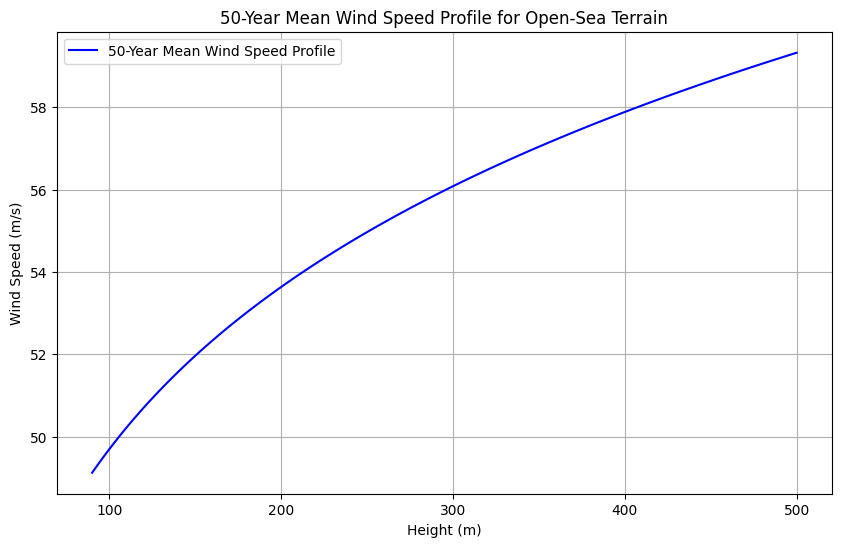

(c) Turbulence Intensity at 90 m: 0.1055


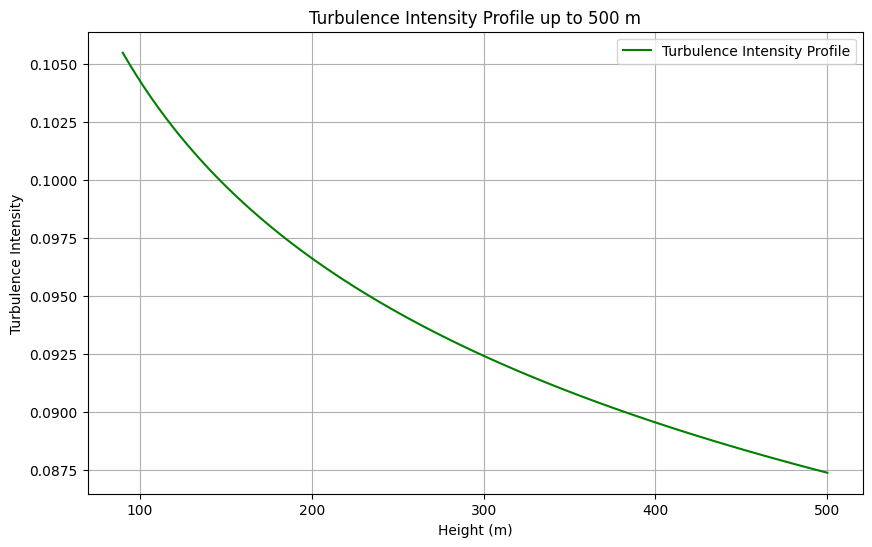

(d) 50-Year Gust Wind Speed at 90 m: 73.69 m/s


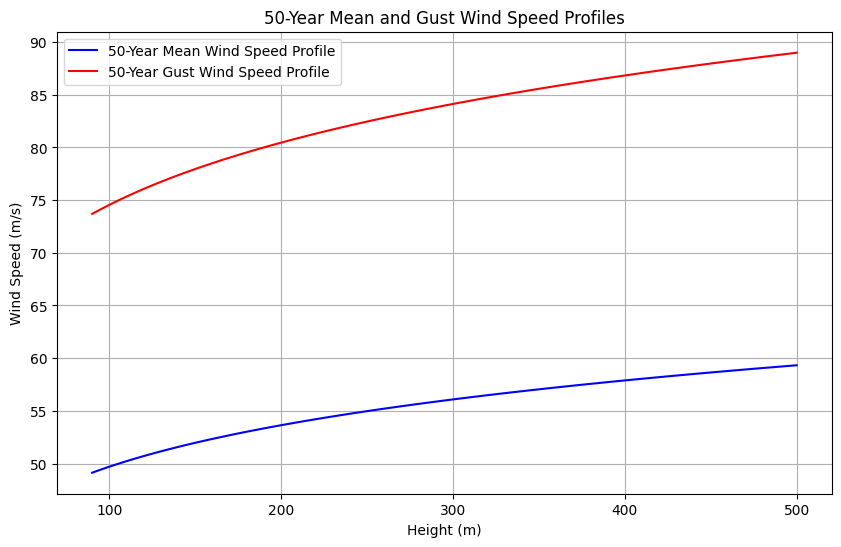

(e) Mean Wind Pressure at 90 m: 1479.37 Pa
(e) Gust Wind Pressure at 90 m: 3328.59 Pa


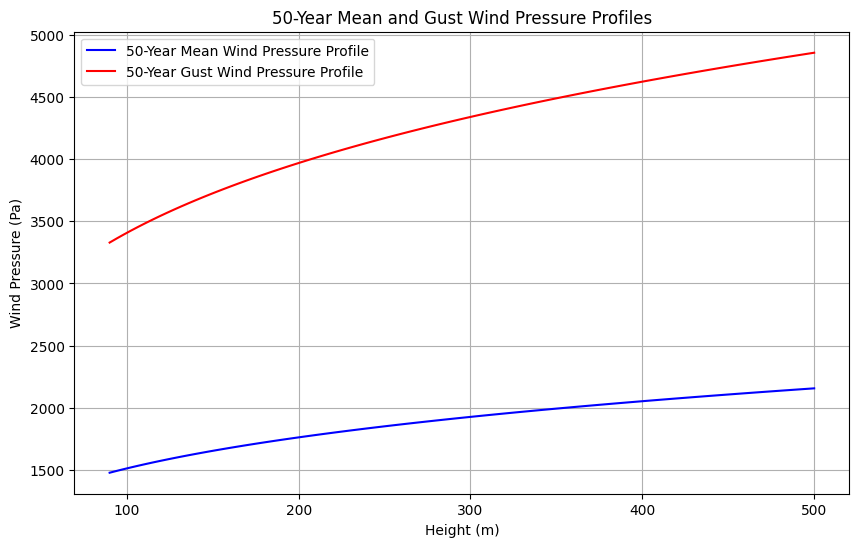

In [ ]:
#problem2 (a)
import pandas as pd
import numpy as np
from scipy.stats import genextreme
import matplotlib.pyplot as plt
from google.colab import files

# 1. 上传文件并读取数据
uploaded = files.upload()
data = pd.read_excel('Year.xlsx', header=0)  # 使用你的文件名
annual_max_wind_speed = data['WindSpeed']

# 确保数据是数值类型
annual_max_wind_speed = pd.to_numeric(annual_max_wind_speed, errors='coerce').dropna()

# 2. 拟合 Fisher-Tippett 分布
params = genextreme.fit(annual_max_wind_speed)

# 3. 计算极端风速
return_periods = [10, 20, 50, 100]
extreme_wind_speeds = []

for rp in return_periods:
    extreme_speed = genextreme.ppf(1 - 1/rp, *params)
    extreme_wind_speeds.append(extreme_speed)

# 输出结果
for rp, speed in zip(return_periods, extreme_wind_speeds):
    print(f"(a) {rp}-year return period extreme wind speed: {speed:.2f} m/s")
#(b)
# 设定参数
anemometer_height = 90  # m
gradient_height = 500  # m
power_exponent = 0.11

# 计算风速剖面
mean_wind_speed_50_year = extreme_wind_speeds[2]  # 50年返回期风速
heights = np.linspace(anemometer_height, gradient_height, 100)
mean_wind_speed_profile = mean_wind_speed_50_year * (heights / anemometer_height) ** power_exponent

# 打印结果
print(f"(b) 50-Year Mean Wind Speed at {anemometer_height} m: {mean_wind_speed_50_year:.2f} m/s")

# 绘图
plt.figure(figsize=(10, 6))
plt.plot(heights, mean_wind_speed_profile, label='50-Year Mean Wind Speed Profile', color='blue')
plt.xlabel('Height (m)')
plt.ylabel('Wind Speed (m/s)')
plt.title('50-Year Mean Wind Speed Profile for Open-Sea Terrain')
plt.grid()
plt.legend()
plt.show()
#c
# 设定湍流强度参数
turbulence_intensity = 0.1055
turbulence_exponent = -0.11

# 计算湍流强度剖面
turbulence_profile = turbulence_intensity * (heights / anemometer_height) ** turbulence_exponent

print(f"(c) Turbulence Intensity at {anemometer_height} m: {turbulence_intensity:.4f}")

plt.figure(figsize=(10, 6))
plt.plot(heights, turbulence_profile, label='Turbulence Intensity Profile', color='green')
plt.xlabel('Height (m)')
plt.ylabel('Turbulence Intensity')
plt.title('Turbulence Intensity Profile up to 500 m')
plt.grid()
plt.legend()
plt.show()
#d
# 设定阵风与平均风速的关系
gust_factor = 1.5  # 例如的因子，可以根据具体公式调整？
gust_wind_speed_profile = gust_factor * mean_wind_speed_profile

print(f"(d) 50-Year Gust Wind Speed at {anemometer_height} m: {gust_factor * mean_wind_speed_50_year:.2f} m/s")

plt.figure(figsize=(10, 6))
plt.plot(heights, mean_wind_speed_profile, label='50-Year Mean Wind Speed Profile', color='blue')
plt.plot(heights, gust_wind_speed_profile, label='50-Year Gust Wind Speed Profile', color='red')
plt.xlabel('Height (m)')
plt.ylabel('Wind Speed (m/s)')
plt.title('50-Year Mean and Gust Wind Speed Profiles')
plt.grid()
plt.legend()
plt.show()
#e
# 风压计算（使用公式: P = 0.613 * V^2）
mean_wind_pressure_profile = 0.613 * mean_wind_speed_profile ** 2
gust_wind_pressure_profile = 0.613 * gust_wind_speed_profile ** 2

print(f"(e) Mean Wind Pressure at {anemometer_height} m: {0.613 * mean_wind_speed_50_year**2:.2f} Pa")
print(f"(e) Gust Wind Pressure at {anemometer_height} m: {0.613 * (gust_factor * mean_wind_speed_50_year)**2:.2f} Pa")

plt.figure(figsize=(10, 6))
plt.plot(heights, mean_wind_pressure_profile, label='50-Year Mean Wind Pressure Profile', color='blue')
plt.plot(heights, gust_wind_pressure_profile, label='50-Year Gust Wind Pressure Profile', color='red')
plt.xlabel('Height (m)')
plt.ylabel('Wind Pressure (Pa)')
plt.title('50-Year Mean and Gust Wind Pressure Profiles')
plt.grid()
plt.legend()
plt.show()